In [1]:
# 0. 가상환경 확인
import sys
print('Python 실행 경로:', sys.executable)
print('Python 버전:', sys.version)

Python 실행 경로: /workspaces/webapp-dev-trial/quant_project/.venv/bin/python3
Python 버전: 3.12.1 (main, Nov 27 2025, 10:47:52) [GCC 13.3.0]


In [2]:
# 1. 패키지 임포트 및 버전 확인
import koreanize_matplotlib
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

print(f'pandas      {pd.__version__}')
print(f'numpy       {np.__version__}')
print(f'yfinance    {yf.__version__}')
print(f'sklearn     {__import__("sklearn").__version__}')
print(f'statsmodels {sm.__version__}')
print(f'plotly      {__import__("plotly").__version__}')

pandas      2.3.3
numpy       2.4.2
yfinance    1.2.0
sklearn     1.8.0
statsmodels 0.14.6
plotly      6.5.2


In [3]:
# 2. 주가 데이터 수집 (삼성전자 3개월)
df = yf.download('005930.KS', period='3mo', auto_adjust=True)
print(f'데이터 shape: {df.shape}')
df.tail()

[*********************100%***********************]  1 of 1 completed

데이터 shape: (60, 5)


Price,Close,High,Low,Open,Volume
Ticker,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS
Date,,,,,
2026-02-12,178600.0,179600.0,170100.0,171200.0,41296011
2026-02-13,181200.0,184400.0,178900.0,179500.0,34454192
2026-02-19,190000.0,190900.0,187100.0,188000.0,27049388
2026-02-20,190100.0,190300.0,188600.0,190000.0,24213880
2026-02-23,193000.0,197600.0,190500.0,194400.0,26364684


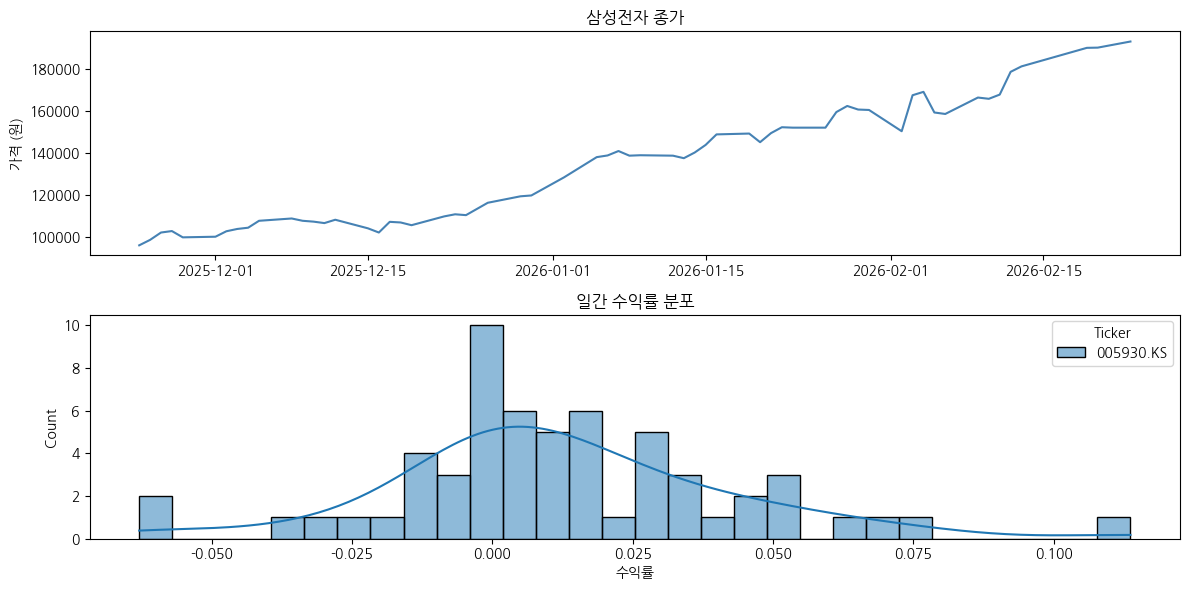

In [4]:
# 3. matplotlib + seaborn 시각화
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

axes[0].plot(df.index, df['Close'], color='steelblue')
axes[0].set_title('삼성전자 종가')
axes[0].set_ylabel('가격 (원)')

returns = df['Close'].pct_change().dropna()
sns.histplot(returns, bins=30, kde=True, ax=axes[1], color='steelblue')
axes[1].set_title('일간 수익률 분포')
axes[1].set_xlabel('수익률')

plt.tight_layout()
plt.show()

In [5]:
# 4. plotly 캔들차트
fig = go.Figure(go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close']
))
fig.update_layout(
    title='삼성전자 캔들차트',
    xaxis_title='날짜',
    yaxis_title='가격 (원)',
    height=400
)
fig.show()

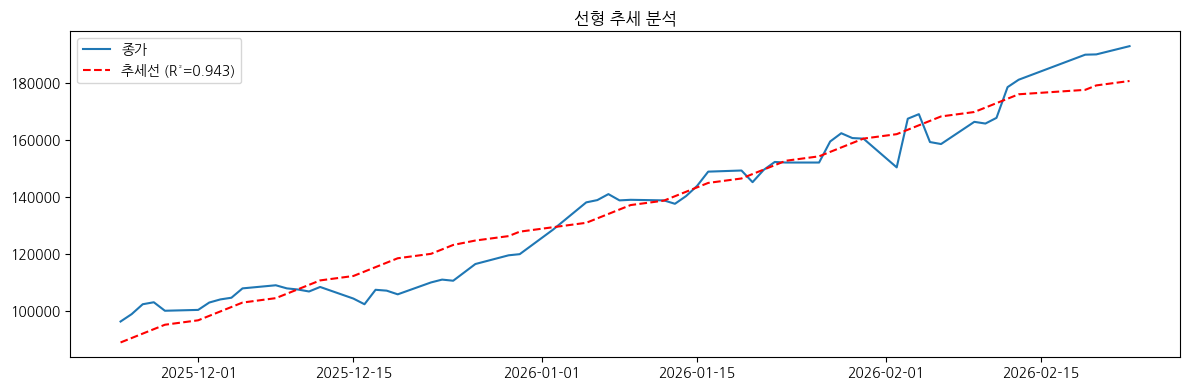

In [6]:
# 5. 선형 회귀 (sklearn)
close = df['Close'].values
X = np.arange(len(close)).reshape(-1, 1)
y = close

model = LinearRegression().fit(X, y)
trend = model.predict(X)

plt.figure(figsize=(12, 4))
plt.plot(df.index, close, label='종가')
plt.plot(df.index, trend, 'r--', label=f'추세선 (R²={model.score(X, y):.3f})')
plt.title('선형 추세 분석')
plt.legend()
plt.tight_layout()
plt.show()